In [1]:
import pandas as pd
from pathlib import Path

csv_root = Path("data")
full_data = pd.concat([pd.read_csv(csv_root/"smaug.csv", index_col=0), pd.read_csv(csv_root/"elwe.csv", index_col=0)])
# full_data.to_csv("gather/full.csv")
full_data['hardware_name'] = full_data['cpu'] + " / " + full_data['gpu']
full_data["System"] = full_data["system_name"]+ "\n("+full_data['num_atoms'].astype(str)+")"
full_data = full_data[full_data['gpu'] != "NVIDIA RTX A6000"] # Only one point
# full_data['Hardware ID'] = full_data['hardware_name'].factorize()[0] + 1
full_data

,system_name,system_type,num_atoms,simu_id,equi_time_seconds,cpu,gpu,performace_ns_day,hardware_name,System
0,SAMPL6-OA,complex,9207,rtx4070ti,10.0,AMD EPYC 7443 24-Core Processor,NVIDIA GeForce RTX 4070 Ti SUPER,934.324,AMD EPYC 7443 24-Core Processor / NVIDIA GeFor...,SAMPL6-OA\n(9207)
1,SAMPL6-OA,complex,9207,rtx4000,13.0,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz,NVIDIA RTX 4000 Ada Generation,894.667,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA...,SAMPL6-OA\n(9207)
2,SAMPL6-OA,complex,9207,rtxa4000,9.0,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz,NVIDIA RTX A4000,932.075,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA...,SAMPL6-OA\n(9207)
3,SAMPL6-OA,ligand,3630,rtx4070ti,5.0,AMD EPYC 7443 24-Core Processor,NVIDIA GeForce RTX 4070 Ti SUPER,1246.916,AMD EPYC 7443 24-Core Processor / NVIDIA GeFor...,SAMPL6-OA\n(3630)
5,SAMPL6-OA,ligand,3630,rtx4000,4.0,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz,NVIDIA RTX 4000 Ada Generation,1312.631,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA...,SAMPL6-OA\n(3630)
...,...,...,...,...,...,...,...,...,...,...
43,p38,complex,86364,gpu:RTX1070Ti:1,245.0,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz,NVIDIA GeForce GTX 1070 Ti,67.924,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NV...,p38\n(86364)
44,p38,complex,86364,gpu:RTX1070:1,204.0,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz,NVIDIA GeForce GTX 1070,62.827,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NV...,p38\n(86364)
45,p38,ligand,6802,gpu:A4000:1,10.0,AMD Ryzen Threadripper PRO 3975WX 32-Cores,NVIDIA RTX A4000,870.327,AMD Ryzen Threadripper PRO 3975WX 32-Cores / N...,p38\n(6802)
46,p38,ligand,6802,gpu:RTX1070Ti:1,21.0,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz,NVIDIA GeForce GTX 1070 Ti,501.999,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NV...,p38\n(6802)


In [2]:
for item in full_data['hardware_name'].unique():
    print(item)
for item in full_data['System'].unique():
    print(item)

AMD EPYC 7443 24-Core Processor / NVIDIA GeForce RTX 4070 Ti SUPER
Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA RTX 4000 Ada Generation
Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA RTX A4000
AMD Ryzen Threadripper PRO 3975WX 32-Cores / NVIDIA RTX A4000
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NVIDIA GeForce GTX 1070 Ti
Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NVIDIA GeForce GTX 1070
SAMPL6-OA
(9207)
SAMPL6-OA
(3630)
tyk2
(66425)
tyk2
(5817)
mcl1
(34827)
mcl1
(5389)
ptp1b
(74246)
ptp1b
(9647)
thrombin
(49471)
thrombin
(5980)
A2A
(84996)
A2A
(5005)
CyclophilinD
(31857)
CyclophilinD
(7304)
p38
(86364)
p38
(6802)


In [3]:
# Give an order
mapping = {
    'AMD EPYC 7443 24-Core Processor / NVIDIA GeForce RTX 4070 Ti SUPER': 1,
    'Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA RTX 4000 Ada Generation': 2,
    'AMD Ryzen Threadripper PRO 3975WX 32-Cores / NVIDIA RTX A4000': 3,
    'Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA RTX A4000': 4,
    'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NVIDIA GeForce GTX 1070 Ti': 5,
    'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NVIDIA GeForce GTX 1070': 6,
    'AMD Ryzen Threadripper PRO 3975WX 32-Cores / NVIDIA RTX A6000': 7
}

full_data['Hardware ID'] = full_data['hardware_name'].map(mapping)
full_data

,system_name,system_type,num_atoms,simu_id,equi_time_seconds,cpu,gpu,performace_ns_day,hardware_name,System,Hardware ID
0,SAMPL6-OA,complex,9207,rtx4070ti,10.0,AMD EPYC 7443 24-Core Processor,NVIDIA GeForce RTX 4070 Ti SUPER,934.324,AMD EPYC 7443 24-Core Processor / NVIDIA GeFor...,SAMPL6-OA\n(9207),1
1,SAMPL6-OA,complex,9207,rtx4000,13.0,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz,NVIDIA RTX 4000 Ada Generation,894.667,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA...,SAMPL6-OA\n(9207),2
2,SAMPL6-OA,complex,9207,rtxa4000,9.0,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz,NVIDIA RTX A4000,932.075,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA...,SAMPL6-OA\n(9207),4
3,SAMPL6-OA,ligand,3630,rtx4070ti,5.0,AMD EPYC 7443 24-Core Processor,NVIDIA GeForce RTX 4070 Ti SUPER,1246.916,AMD EPYC 7443 24-Core Processor / NVIDIA GeFor...,SAMPL6-OA\n(3630),1
5,SAMPL6-OA,ligand,3630,rtx4000,4.0,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz,NVIDIA RTX 4000 Ada Generation,1312.631,Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA...,SAMPL6-OA\n(3630),2
...,...,...,...,...,...,...,...,...,...,...,...
43,p38,complex,86364,gpu:RTX1070Ti:1,245.0,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz,NVIDIA GeForce GTX 1070 Ti,67.924,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NV...,p38\n(86364),5
44,p38,complex,86364,gpu:RTX1070:1,204.0,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz,NVIDIA GeForce GTX 1070,62.827,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NV...,p38\n(86364),6
45,p38,ligand,6802,gpu:A4000:1,10.0,AMD Ryzen Threadripper PRO 3975WX 32-Cores,NVIDIA RTX A4000,870.327,AMD Ryzen Threadripper PRO 3975WX 32-Cores / N...,p38\n(6802),3
46,p38,ligand,6802,gpu:RTX1070Ti:1,21.0,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz,NVIDIA GeForce GTX 1070 Ti,501.999,Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NV...,p38\n(6802),5


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib as mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'  # Use Computer Modern fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amsfonts}'
mpl.rcParams['font.size'] = 30

In [5]:
simu_size_csv_root = Path("data")

def plot_performance(fig, gs):
    # Define the desired order for the X-axis
    desired_order_complex = [
        'p38\n(86364)',
        'A2A\n(84996)',
        'ptp1b\n(74246)',
        'tyk2\n(66425)',
        'thrombin\n(49471)',
        'mcl1\n(34827)',
        'CyclophilinD\n(31857)',
        'SAMPL6-OA\n(9207)',
    ]
    desired_order_ligand = [
        'p38\n(6802)',
        'A2A\n(5005)',
        'ptp1b\n(9647)',
        'tyk2\n(5817)',
        'thrombin\n(5980)',
        'mcl1\n(5389)',
        'CyclophilinD\n(7304)',
        'SAMPL6-OA\n(3630)'
    ]

    # Split into Ligand and Complex
    ligand_data = full_data[full_data['system_type'] == 'ligand']
    complex_data = full_data[full_data['system_type'] == 'complex']

    # Pivot data for heatmap
    ligand_matrix = ligand_data.pivot_table(index="Hardware ID", columns="System", values="performace_ns_day")
    complex_matrix = complex_data.pivot_table(index="Hardware ID", columns="System", values="performace_ns_day")

    ligand_matrix = ligand_matrix.reindex(columns=desired_order_ligand)
    complex_matrix = complex_matrix.reindex(columns=desired_order_complex)
    # # Ensure the pivoted data forms matrices (check the structure)
    # print("Ligand Matrix:\n", ligand_matrix)
    # print("Complex Matrix:\n", complex_matrix)

    # First subplot (top-left)
    ax1 = fig.add_subplot(gs[0, 0])  # First row, first column

    # Ligand heatmap
    sns.heatmap(ligand_matrix, annot=True, fmt=".0f", cmap="viridis", cbar=True, ax=ax1)
    
    row, col = 2, 4  # Zero-based indexing for matrix coordinates
    rect = Rectangle((col, row), 1, 1, fill=False, edgecolor='red', linewidth=4)  # Create a rectangle
    ax1.add_patch(rect)  # Add the rectangle to the plot
    
    # Access the color bar and set its label
    cbar = ax1.collections[0].colorbar  # Access the color bar associated with the heatmap
    # # Set scientific notation on the color bar
    # formatter = ScalarFormatter(useMathText=True)  # Use scientific notation
    # formatter.set_scientific(True)                 # Enable scientific formatting
    # formatter.set_powerlimits((-2, 2))             # Set limits for scientific notation
    # cbar.ax.yaxis.set_major_formatter(formatter)   # Apply formatter to color bar axis
    cbar.set_label("GMX's performance [ns/day]", rotation=270, labelpad=35)  # Set label and rotate it
    # Rotate the x-axis and y-axis tick labels
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor", fontsize=27)  # Rotate x-axis
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)  # Rotate y-axis (optional)
    ax1.set_title("Ligand")
    # plt.xlabel("Systems")
    # plt.ylabel("GPU/System")

    # Complex heatmap
    # Second subplot (top-right)
    ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
    sns.heatmap(complex_matrix, annot=True, fmt=".0f", cmap="magma", cbar=True, ax=ax2)
    
    row, col = 2, 4  # Zero-based indexing for matrix coordinates
    rect = Rectangle((col, row), 1, 1, fill=False, edgecolor='red', linewidth=4)  # Create a rectangle
    ax2.add_patch(rect)  # Add the rectangle to the plot
    
    # Access the color bar and set its label
    cbar = ax2.collections[0].colorbar  # Access the color bar associated with the heatmap
    # # Set scientific notation on the color bar
    # formatter = ScalarFormatter(useMathText=True)  # Use scientific notation
    # formatter.set_scientific(True)                 # Enable scientific formatting
    # formatter.set_powerlimits((-2, 2))             # Set limits for scientific notation
    # cbar.ax.yaxis.set_major_formatter(formatter)   # Apply formatter to color bar axis
    cbar.set_label("GMX's performance [ns/day]", rotation=270, labelpad=35)  # Set label and rotate it
    # Rotate the x-axis and y-axis tick labels
    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor", fontsize=27)  # Rotate x-axis
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)  # Rotate y-axis (optional)
    ax2.set_title("Complex")
    # plt.xlabel("Number of Atoms")
    # plt.ylabel("GPU/System"


def simu_time(fig, gs):
    suffix = "_thrombin_amd-ryzen_nvidia-rtxa4000"
    # Plotting the heatmap
    ax1 = fig.add_subplot(gs[1,0])  # Second row, spans all columns
    makespan_data_fep = pd.read_pickle(f"makespan_data_fep{suffix}.dfpkl")
    sns.heatmap(makespan_data_fep, norm=plt.Normalize(vmin=0, vmax=720),
                cmap='twilight', linewidths=0, ax=ax1)
    cbar = ax1.collections[0].colorbar  # Access the color bar associated with the heatmap
    cbar.set_label('Completion time [hours]', rotation=270, labelpad=35)  # Set label and rotate i
    ax1.set(
        title='FEP',
        xlabel='Number of computers',
        ylabel='Number of ligands',
    )
    ax1.invert_yaxis()
    
    ax2 = fig.add_subplot(gs[1,1])  # Second row, spans all columns
    makespan_data_mmgbsa = pd.read_pickle(f"makespan_data_mmgbsa{suffix}.dfpkl")
    sns.heatmap(makespan_data_mmgbsa, norm=plt.Normalize(vmin=0, vmax=72), cmap='twilight', linewidths=0, ax=ax2)
    cbar = ax2.collections[0].colorbar  # Access the color bar associated with the heatmap
    cbar.set_label('Completion time [hours]', rotation=270, labelpad=35)  # Set label and rotate i
    ax2.set(
        title='MMGBSA',
        xlabel='Number of computers',
        ylabel='Number of ligands'
    )
    ax2.invert_yaxis()
    mean_speed_off = np.mean(makespan_data_fep / makespan_data_mmgbsa)
    print("Mean of element-wise division:", mean_speed_off)
    
    ax2.text(
        0.70, 0.65,               # Coordinates (center of the plot)
        f'$\\times${round(mean_speed_off)}',                  # Text to display
        color='black',      # Bright gray color
        # alpha=0.25,            # Transparency (0: fully transparent, 1: fully opaque)
        fontsize=200,            # Font size to cover most of the figure
        ha='center',            # Horizontal alignment
        va='center',            # Vertical alignment
        transform=ax2.transAxes,  # Use axis coordinates (0 to 1)
        # rotation=30             # Optional: Rotate the text
    )




def _simu_time_per_lig_m1(ax, makespan_data, simu_type='FEP'):
    time_per_lig_mean = makespan_data.div(makespan_data.index, axis=0).mean(axis=0)
    time_per_lig_std = makespan_data.div(makespan_data.index, axis=0).std(axis=0)
    # Increase frame thickness
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # Adjust thickness as needed

    # Plot with error bars
    ax.errorbar(
        time_per_lig_mean.index,  # x values
        time_per_lig_mean.values,  # y values
        yerr=time_per_lig_std.values,  # Error bars (standard deviation)
        fmt='o--',
        ecolor='#888888',
        markersize=16,
        markerfacecolor='#00D1FF',
        markeredgecolor='#0A0A0A',
        linewidth=3,
        alpha=0.8,
        label=simu_type
    )

    # Enhance labels and title
    ax.set_xlabel('Number of computers', fontweight='bold', labelpad=10)
    # ax.set_title(simu_type, fontweight='bold', pad=15)
    # ax.set_title(f'{simu_type}. 10--1000 ligands', fontweight='bold', pad=15)

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major')
    ax.set_xticks([10, 50, 100, 150, 200])
    
    if simu_type == "FEP":
        ax.set_yticks(np.arange(np.floor(time_per_lig_mean.min()), np.ceil(time_per_lig_mean.max()) + 1, 1))
    else:
        ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
    
    # Add a grid
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Add legend
    ax.legend(frameon=True, framealpha=0.5, edgecolor='gray')
    ax.tick_params(axis='both', width=2, size=5)  # Change tick width and label size
    # plt.ticklabel_format(axis='y', style='scientific', scilimits=(-1,3))
    


def _simu_time_per_lig_m2(ax, simu_type_makespan_data:dict):
    
    ax1 = ax    
    ax2 = ax.twinx()
    for simu_type, makespan_data in simu_type_makespan_data.items():
        if simu_type == "FEP":
            ax_temp = ax1
        else:
            ax_temp = ax2
        time_per_lig_mean = makespan_data.div(makespan_data.index, axis=0).mean(axis=0)
        time_per_lig_std = makespan_data.div(makespan_data.index, axis=0).std(axis=0)


        # Plot with error bars
        ax_temp.errorbar(
            time_per_lig_mean.index,  # x values
            time_per_lig_mean.values,  # y values
            yerr=time_per_lig_std.values,  # Error bars (standard deviation)
            fmt='o--',
            ecolor='#888888',
            markersize=16,
            markerfacecolor='#00D1FF',
            markeredgecolor='#0A0A0A',
            linewidth=3,
            alpha=0.8,
            label=simu_type
        )

        # if simu_type == "FEP":
        #     ax_temp.set_yticks(np.arange(np.floor(time_per_lig_mean.min()), np.ceil(time_per_lig_mean.max()) + 1, 1))
        # else:
        #     ax_temp.set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
        
        ax_temp.tick_params(axis='both', which='major')
        ax_temp.tick_params(axis='both', width=2, size=5)  # Change tick width and label size

    # Increase frame thickness
    for spine in ax1.spines.values():
        spine.set_linewidth(2)  # Adjust thickness as needed
    # Enhance labels and title
    ax1.set_xlabel('Number of computers', fontweight='bold', labelpad=10)
    # ax.set_title(simu_type, fontweight='bold', pad=15)
    # ax.set_title(f'{simu_type}. 10--1000 ligands', fontweight='bold', pad=15)

    # Adjust tick parameters
    
    ax1.set_xticks([10, 50, 100, 150, 200])
    # Add a grid
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    
def _simu_time_per_lig_m3(ax, makespan_data_fep, makespan_data_mmgbsa):
    # Increase frame thickness
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # Adjust thickness as needed
    time_per_lig_mean_fep = makespan_data_fep.div(makespan_data_fep.index, axis=0).mean(axis=0)
    time_per_lig_std_fep = makespan_data_fep.div(makespan_data_fep.index, axis=0).std(axis=0)

    time_per_lig_mean_mmgbsa = makespan_data_mmgbsa.div(makespan_data_mmgbsa.index, axis=0).mean(axis=0)
    display(time_per_lig_mean_fep)
    display(time_per_lig_mean_mmgbsa)
    time_per_lig_std_mmgbsa = makespan_data_mmgbsa.div(makespan_data_mmgbsa.index, axis=0).std(axis=0)
    
    error = (((time_per_lig_mean_fep.values / time_per_lig_mean_mmgbsa.values**2) * time_per_lig_std_mmgbsa.values)**2 + \
        (time_per_lig_std_fep.values / time_per_lig_mean_mmgbsa.values)**2)**0.5

    # Plot with error bars
    ax.errorbar(
        time_per_lig_mean_fep.index,  # x values
        time_per_lig_mean_fep.values / time_per_lig_mean_mmgbsa.values,  # y values
        yerr=error,
        fmt='o--',
        color='#50225B',
        ecolor='#888888',
        markersize=12,
        markerfacecolor="#50225B",
        markeredgecolor='#0A0A0A',
        linewidth=3,
        alpha=0.8,
        label="t(FEP)/t(MMGBSA)"
    )

    # Enhance labels and title
    ax.set_xlabel('Number of computers', fontweight='bold', labelpad=10)

    # ax.set_yticks([15, 25, 35])
    # ax.set_ylim((10, 40))
    # Add a grid
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(frameon=True, framealpha=0.5, edgecolor='gray', fontsize=15, loc='upper left')

    ax.tick_params(axis='both', width=2, size=5)  # Change tick width and label size
    # ax.tick_params(axis='y', labelsize=30)
    # plt.ticklabel_format(axis='y', style='scientific', scilimits=(-1,3))





def simu_time_per_lig(fig, gs, MODE=1):
    
    suffix = "_thrombin_amd-ryzen_nvidia-rtxa4000"
    if MODE == 1:
        # Plotting the heatmap
        ax1 = fig.add_subplot(gs[0,0])  # Second row, spans all columns
        makespan_data_fep = pd.read_pickle(f"makespan_data_fep{suffix}.dfpkl")
        _simu_time_per_lig_m1(ax1, makespan_data_fep,"FEP")
        
        # Plotting the heatmap
        ax2 = fig.add_subplot(gs[1,0], sharex=ax1)  # Second row, spans all columns
        makespan_data_mmgbsa = pd.read_pickle(f"makespan_data_mmgbsa{suffix}.dfpkl")
        _simu_time_per_lig_m1(ax2, makespan_data_mmgbsa,"MMGBSA")
        # Hide x-axis labels on the top plot to avoid redundancy
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_xlabel("")  # Don't need x-axis label on top
        fig.text(-0.02, 0.5, 'Average time per ligand [hours]', va='center', rotation='vertical')
    elif MODE == 2:
        _simu_time_per_lig_m2(gs,
                              {"FEP":  pd.read_pickle(f"makespan_data_fep{suffix}.dfpkl"),
                               "MMGBSA":  pd.read_pickle(f"makespan_data_mmgbsa{suffix}.dfpkl"),}
                              )
    elif MODE == 3:
        # Plotting the heatmap
        ax1 = fig.add_subplot(gs[0,0])  # Second row, spans all columns
        makespan_data_fep = pd.read_pickle(f"makespan_data_fep{suffix}.dfpkl")
        _simu_time_per_lig_m1(ax1, makespan_data_fep,"FEP")
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_xlabel("")  # Don't need x-axis label on top
        ax1.set_ylabel('Average ligand\ncompletion time [h]', fontweight='bold', labelpad=15)
        
        # Plotting the heatmap
        ax2 = fig.add_subplot(gs[1,0], sharex=ax1)  # Second row, spans all columns
        makespan_data_mmgbsa = pd.read_pickle(f"makespan_data_mmgbsa{suffix}.dfpkl")
        _simu_time_per_lig_m3(ax2, makespan_data_fep, makespan_data_mmgbsa)
        ax2.set_ylabel('Rate', fontweight='bold', labelpad=15)
        
    else:
        raise ValueError("MODE must bew 1 or 2")


# Desired order for plotting
SYSTEM_ORDER = ["p38", "A2A", "ptp1b", "tyk2", "thrombin", "mcl1", "CyclophilinD", "SAMPL6-OA"]
SYSTEM_NAME = {
    "p38": "P38", 
    "A2A": "A2A",
    "ptp1b": "PTP1B",
    "tyk2": "TYK2",
    "thrombin": "Thrombin",
    "mcl1": "MCL1",
    "CyclophilinD": "CyclophilinD",
    "SAMPL6-OA": "SAMPL6-OA"
}

def to_latex(string):
    try:
        return string.replace("_", "\_").replace(" ", "\ ")
    except:
        raise Exception(string)


def simu_size_fep(ax):
    # Create a DataFrame
    df = pd.read_csv(simu_size_csv_root/"simu-size-fep.csv")


    SYSTEM_ORDER_LATEX = [to_latex(SYSTEM_NAME[s]) for s in SYSTEM_ORDER]

    df['System_Name'] = pd.Categorical(
        df['System_Name'].replace(SYSTEM_NAME).map(to_latex), categories=SYSTEM_ORDER_LATEX, ordered=True
    )
    df = df.sort_values("System_Name")

    # Plot the bottom portion (After compression)
    bars_after = ax.bar(df["System_Name"], df["compressed_GB"], label="Compressed", color='skyblue')

    # Plot the top portion (Before compression minus After compression)
    bars_diff = ax.bar(
        df["System_Name"],
        [before - after for before, after in zip(df["non_compressed_GB"], df["compressed_GB"])],
        bottom=df["compressed_GB"],
        label="Non-compressed",
        color='lightcoral'
    )

    # Add numbers at the top of the bars
    for bar_after, bar_diff, after, total in zip(bars_after, bars_diff, df["compressed_GB"], df["non_compressed_GB"]):
        # Add text for the 'After Compression' bars
        ax.text(bar_after.get_x() + bar_after.get_width() / 2,
                bar_after.get_height() / 2,
                f"{after:.1f}",
                ha='center', va='center', color='gray')
        
        # Add text at the top of the stacked bars (Total 'Before Compression')
        ax.text(bar_diff.get_x() + bar_diff.get_width() / 2,
                bar_diff.get_height() + bar_diff.get_y(),
                f"{total:.1f}",
                ha='center', va='bottom', color='black')

    # Calculate compression factors for each system
    df["Compression_Factor"] = df["non_compressed_GB"] / df["compressed_GB"]

    # Calculate the average compression factor
    average_compression_factor = df["Compression_Factor"].mean()

    print(f"Average compression factor (fep): {average_compression_factor:.2f}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', va='center', rotation_mode="anchor", fontsize=27)  # Rotate x-axis

    ax.text(
        0.70, 0.65,               # Coordinates (center of the plot)
        f'$\\times${round(average_compression_factor, 1)}',            # Text to display
        color='lightgray',      # Bright gray color
        # alpha=0.25,            # Transparency (0: fully transparent, 1: fully opaque)
        fontsize=150,            # Font size to cover most of the figure
        ha='center',            # Horizontal alignment
        va='center',            # Vertical alignment
        transform=ax.transAxes,  # Use axis coordinates (0 to 1)
        # rotation=30             # Optional: Rotate the text
    )

    # Add labels and title
    ax.set_ylabel("Size (GB)")
    # ax.set_xlabel("System")
    ax.legend()

def simu_size_mmpbsa(ax):
    # Create a DataFrame
    df = pd.read_csv(simu_size_csv_root/"simu-size-mmpbsa.csv")


    SYSTEM_ORDER_LATEX = [to_latex(SYSTEM_NAME[s]) for s in SYSTEM_ORDER]

    df['System_Name'] = pd.Categorical(
        df['System_Name'].replace(SYSTEM_NAME).map(to_latex), categories=SYSTEM_ORDER_LATEX, ordered=True
    )
    df = df.sort_values("System_Name")

    # Plot the bottom portion (After compression)
    bars_after = ax.bar(df["System_Name"], df["compressed_GB"], label="Compressed", color='skyblue')

    # Plot the top portion (Before compression minus After compression)
    bars_diff = ax.bar(
        df["System_Name"],
        [before - after for before, after in zip(df["non_compressed_GB"], df["compressed_GB"])],
        bottom=df["compressed_GB"],
        label="Non-compressed",
        color='lightcoral'
    )

    # Add numbers at the top of the bars
    for bar_after, bar_diff, after, total in zip(bars_after, bars_diff, df["compressed_GB"], df["non_compressed_GB"]):
        # Add text for the 'After Compression' bars
        ax.text(bar_after.get_x() + bar_after.get_width() / 2,
                bar_after.get_height() / 2,
                f"{after:.1f}",
                ha='center', va='center', color='gray')
        
        # Add text at the top of the stacked bars (Total 'Before Compression')
        ax.text(bar_diff.get_x() + bar_diff.get_width() / 2,
                bar_diff.get_height() + bar_diff.get_y(),
                f"{total:.1f}",
                ha='center', va='bottom', color='black')

    # Calculate compression factors for each system
    df["Compression_Factor"] = df["non_compressed_GB"] / df["compressed_GB"]

    # Calculate the average compression factor
    average_compression_factor = df["Compression_Factor"].mean()

    print(f"Average Compression Factor (mmpbsa): {average_compression_factor:.2f}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', va='center', rotation_mode="anchor", fontsize=27)  # Rotate x-axis

    ax.text(
        0.70, 0.65,               # Coordinates (center of the plot)
        f'$\\times${round(average_compression_factor, 1)}',            # Text to display
        color='lightgray',      # Bright gray color
        # alpha=0.25,            # Transparency (0: fully transparent, 1: fully opaque)
        fontsize=150,            # Font size to cover most of the figure
        ha='center',            # Horizontal alignment
        va='center',            # Vertical alignment
        transform=ax.transAxes,  # Use axis coordinates (0 to 1)
        # rotation=30             # Optional: Rotate the text
    )

    # Add labels and title
    ax.set_ylabel("Size (GB)")
    # ax.set_xlabel("System")
    ax.legend()


Mean of element-wise division: 75.92463181500426
{
   "AMD EPYC 7443 24-Core Processor / NVIDIA GeForce RTX 4070 Ti SUPER": 1,
   "Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA RTX 4000 Ada Generation": 2,
   "AMD Ryzen Threadripper PRO 3975WX 32-Cores / NVIDIA RTX A4000": 3,
   "Intel(R) Xeon(R) E-2136 CPU @ 3.30GHz / NVIDIA RTX A4000": 4,
   "Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NVIDIA GeForce GTX 1070 Ti": 5,
   "Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz / NVIDIA GeForce GTX 1070": 6,
   "AMD Ryzen Threadripper PRO 3975WX 32-Cores / NVIDIA RTX A6000": 7
}


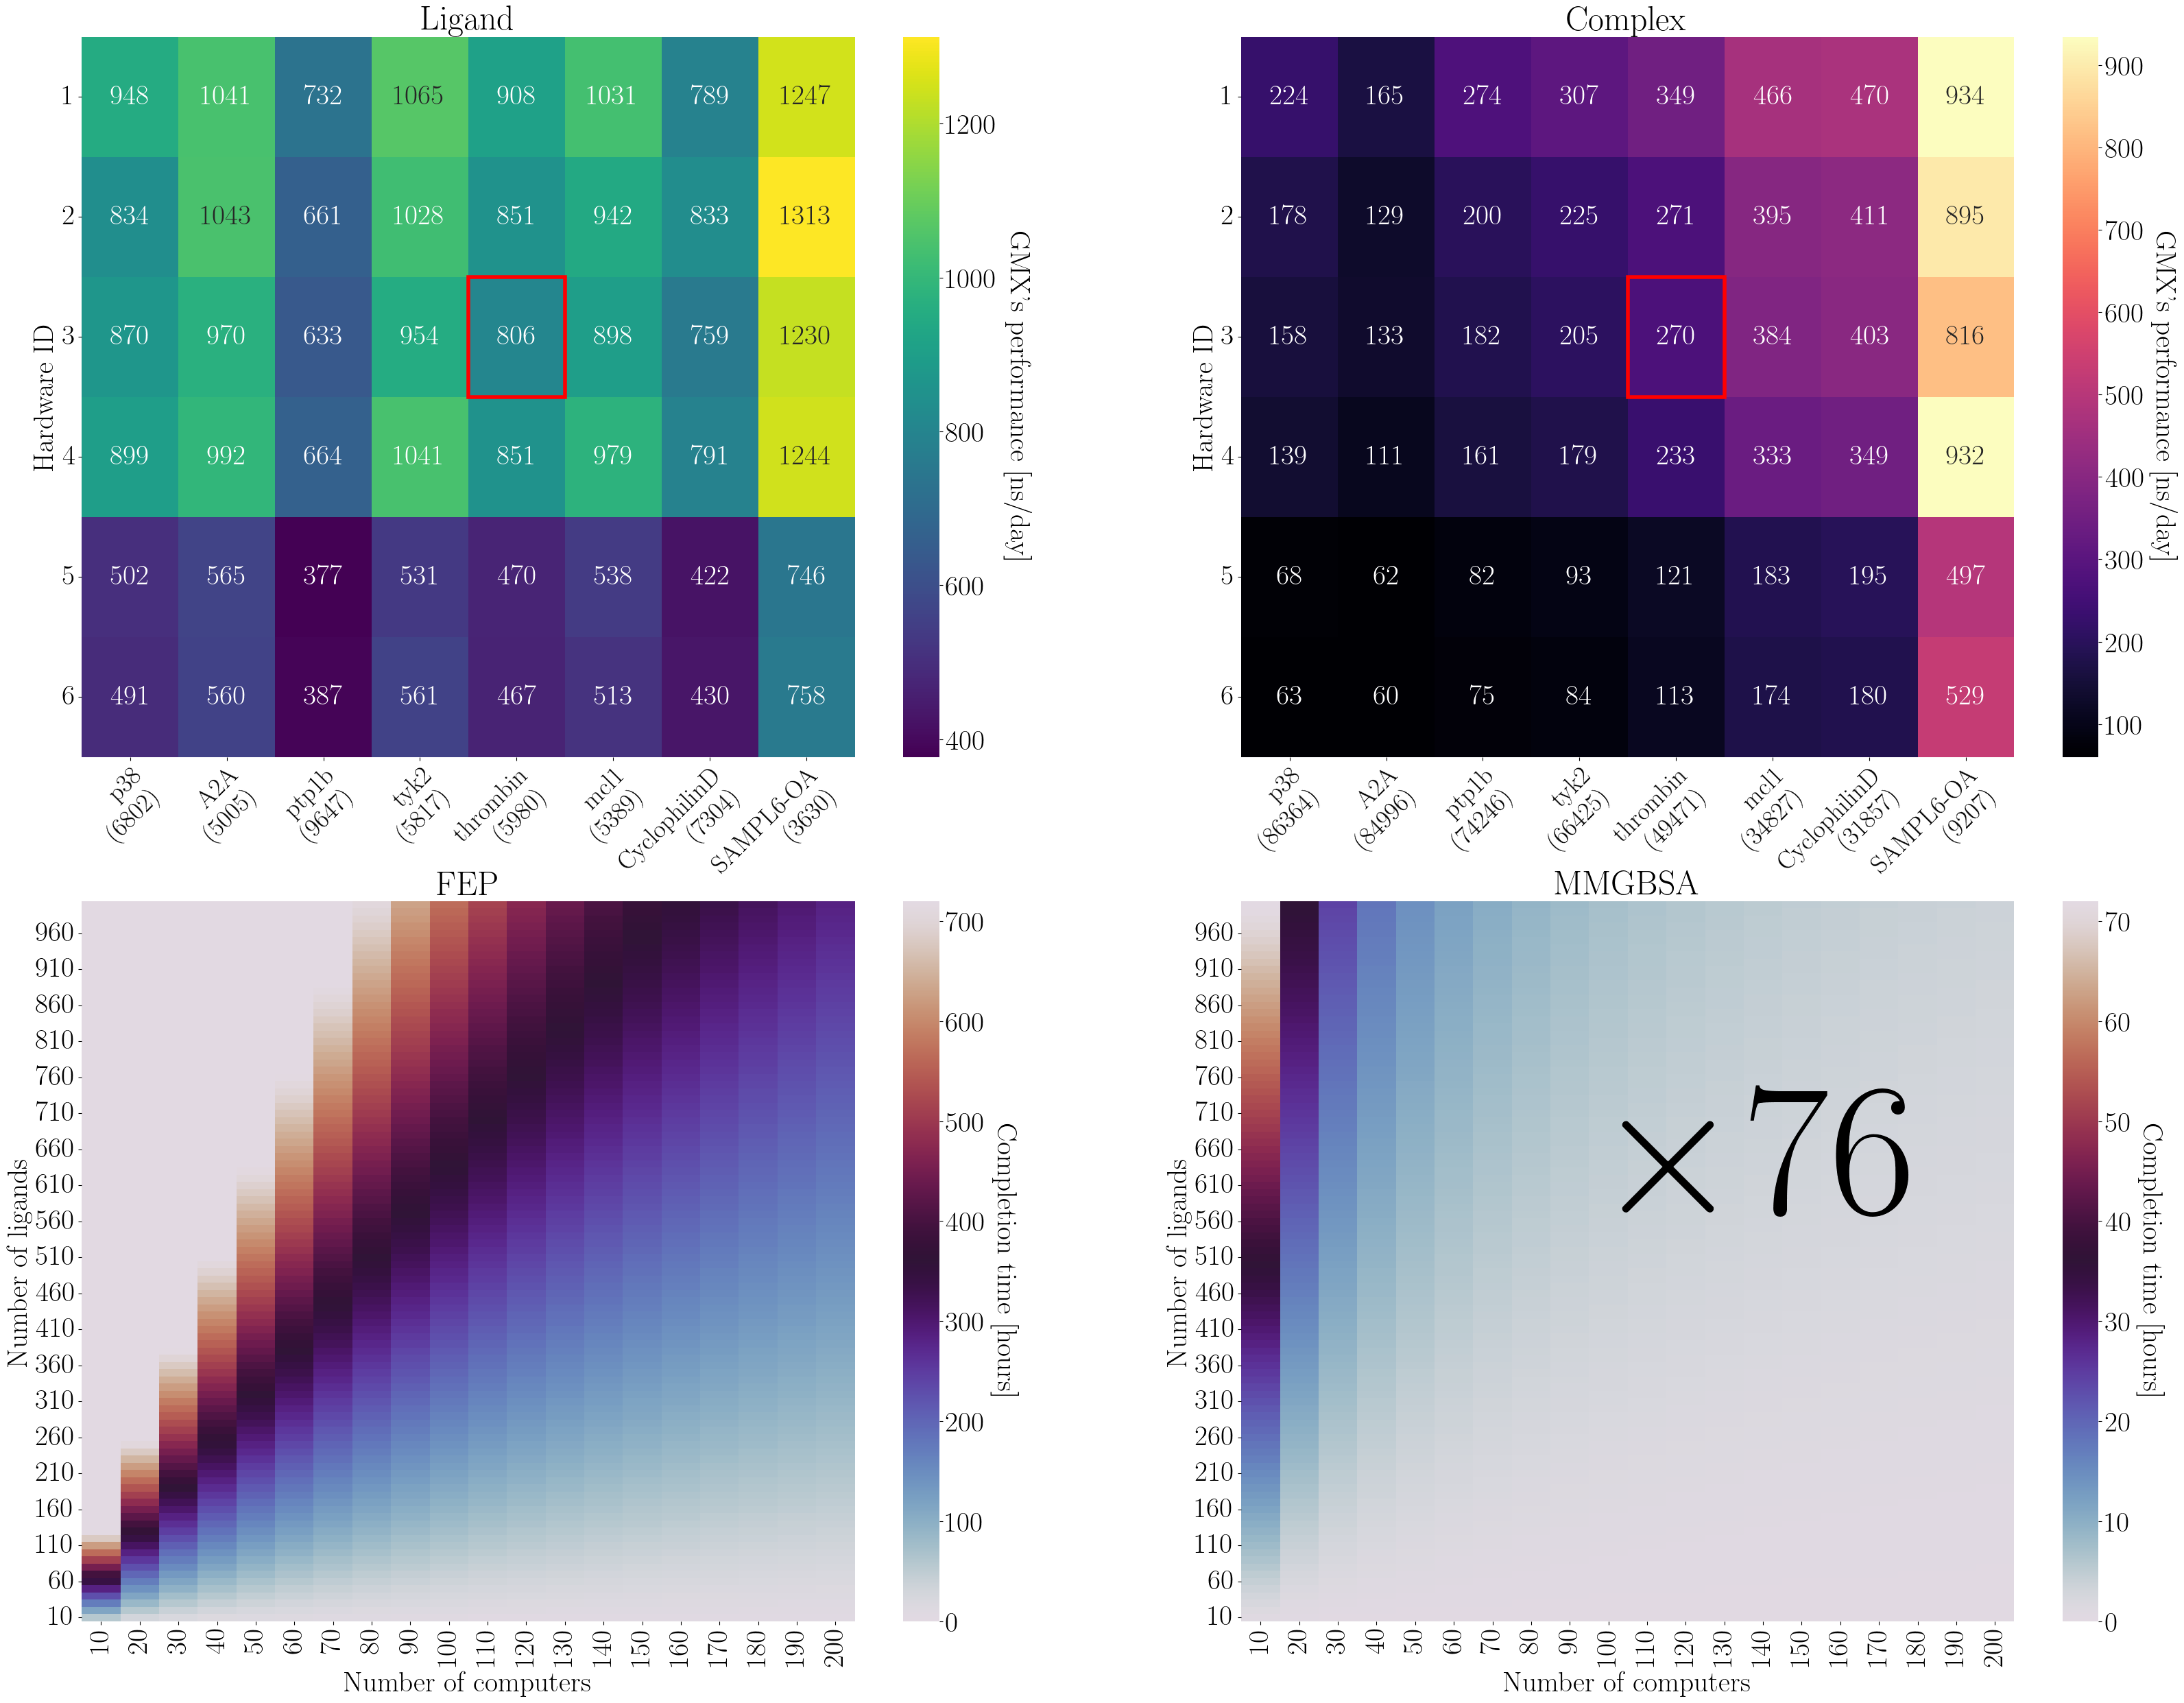

In [6]:


# Create a figure
fig = plt.figure(figsize=(40, 30))

# Define a 2x2 GridSpec layout
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1])  # More height to the last row

plot_performance(fig, gs)
simu_time(fig, gs)

print(json.dumps(mapping, indent=3))

# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


In [7]:
fig.savefig('fep-mmxbsa-cluster-bench.svg',
            bbox_inches="tight",
            pad_inches=0.0,
            transparent=False)

10     5.663079
20     2.831944
30     1.890251
40     1.417216
50     1.136069
60     0.947644
70     0.813461
80     0.711706
90     0.633607
100    0.571185
110    0.517937
120    0.476728
130    0.441192
140    0.410402
150    0.382687
160    0.359361
170    0.339132
180    0.320590
190    0.304274
200    0.289451
dtype: float64

10     0.072431
20     0.036338
30     0.024371
40     0.018363
50     0.014795
60     0.012441
70     0.010748
80     0.009472
90     0.008515
100    0.007686
110    0.007081
120    0.006545
130    0.006115
140    0.005725
150    0.005391
160    0.005106
170    0.004865
180    0.004642
190    0.004451
200    0.004204
dtype: float64

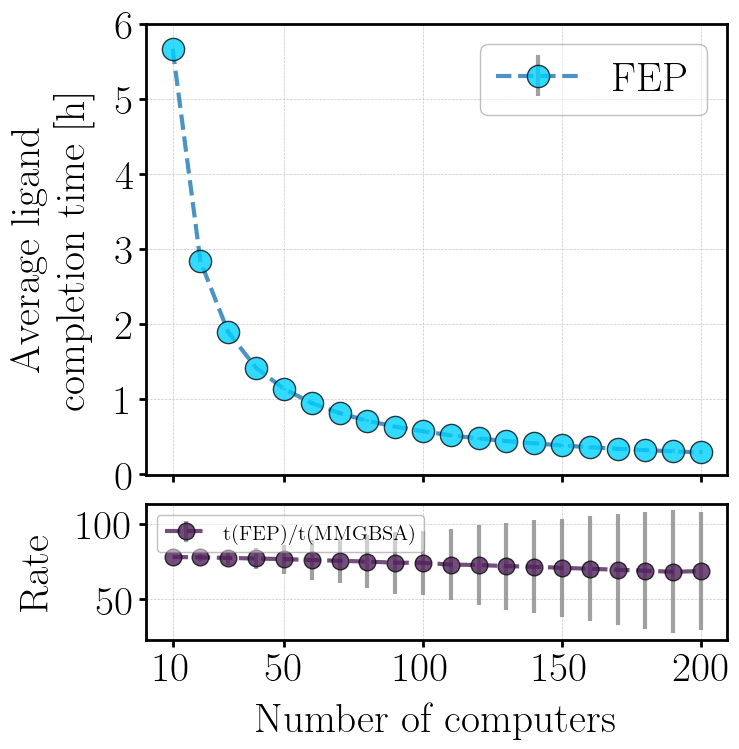

In [8]:
# Create a figure
fig = plt.figure(figsize=(7.5, 8))

# Define a 2x2 GridSpec layout
gs = GridSpec(2, 1, figure=fig, height_ratios=[1, 0.3], hspace=0.1)  # More height to the last row
simu_time_per_lig(fig, gs, MODE=3)
fig.savefig('fep-mmxbsa-avg-time-per-lig.svg',
            bbox_inches="tight",
            pad_inches=0.0,
            transparent=False)

Average compression factor (fep): 2.56
Average Compression Factor (mmpbsa): 2.30


/var/folders/fl/txtwcjh94vs_gkm_s21h8w7m0000gn/T/ipykernel_6429/42600486.py:387: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', va='center', rotation_mode="anchor", fontsize=27)  # Rotate x-axis
/var/folders/fl/txtwcjh94vs_gkm_s21h8w7m0000gn/T/ipykernel_6429/42600486.py:451: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', va='center', rotation_mode="anchor", fontsize=27)  # Rotate x-axis
/var/folders/fl/txtwcjh94vs_gkm_s21h8w7m0000gn/T/ipykernel_6429/3009324223.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


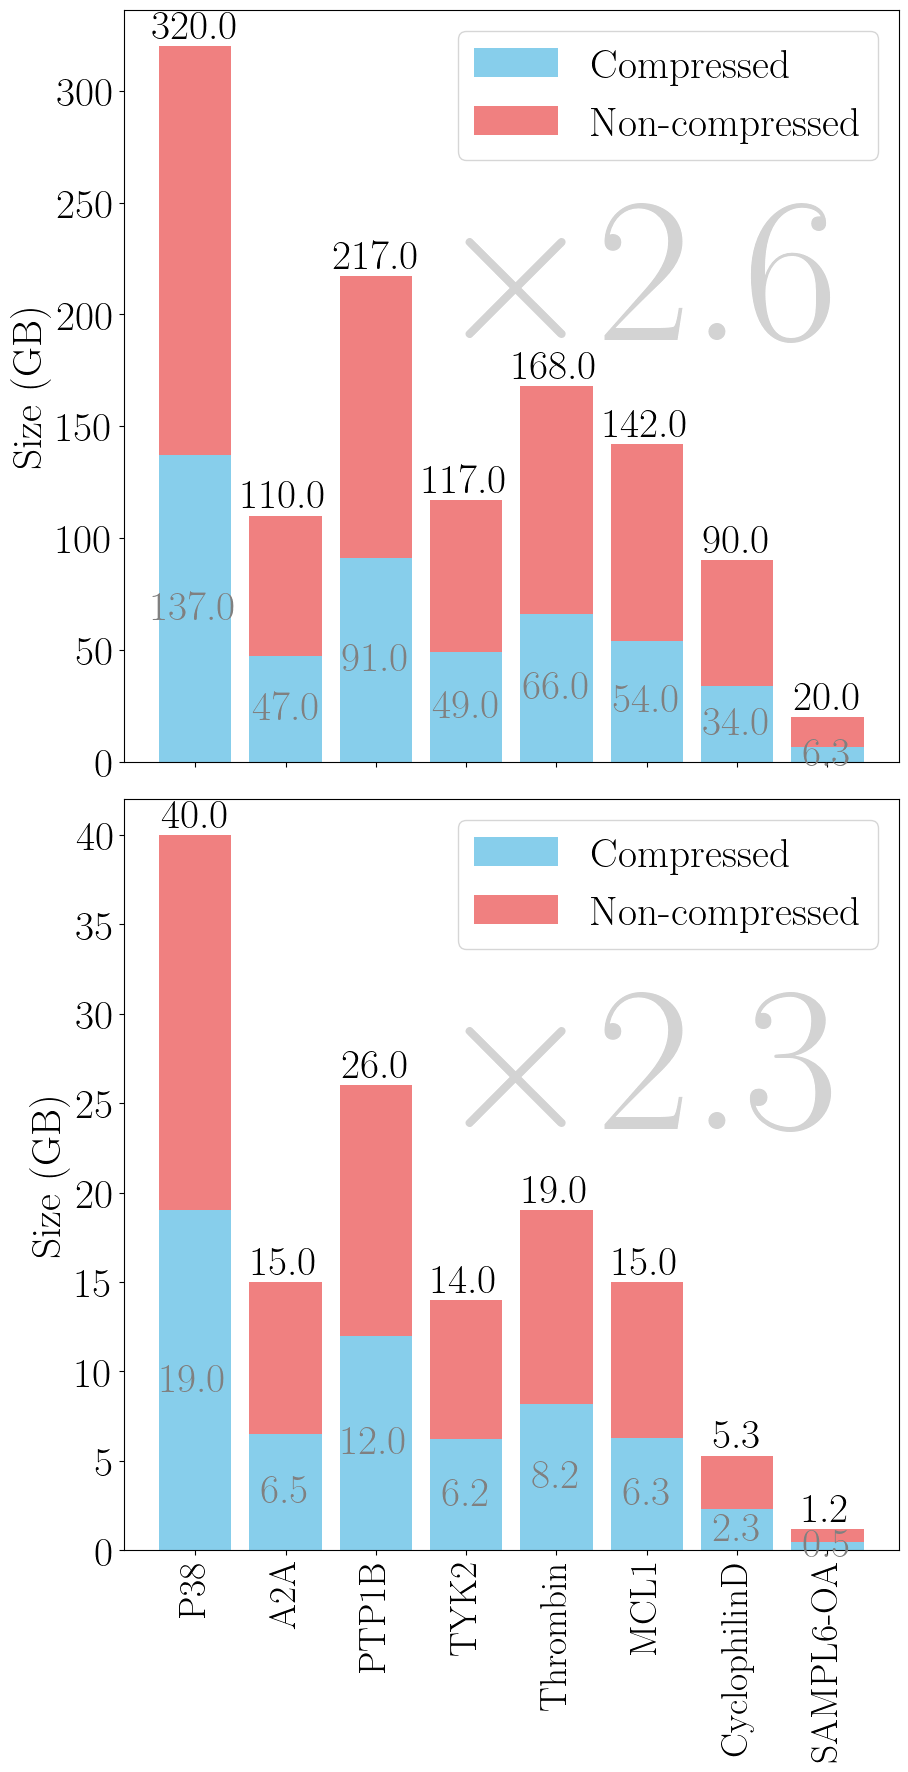

In [9]:


# Create a figure
fig = plt.figure(figsize=(10, 20))

# Define a 2x2 GridSpec layout
gs = GridSpec(2, 1, figure=fig, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)  # <--- share x-axis with ax1

simu_size_fep(ax1)
ax1.tick_params(axis="x", which="both", labelbottom=False)
simu_size_mmpbsa(ax2)
fig.tight_layout()
fig.savefig('fep-mmxbsa-simu-size.svg',
            bbox_inches="tight",
            pad_inches=0.0,
            transparent=False)

In [10]:
# def avg_num_lig_on_one_week():
suffix = "_thrombin_amd-ryzen_nvidia-rtxa4000"
makespan_data_fep = pd.read_pickle(f"makespan_data_fep{suffix}.dfpkl")
fep_avg = makespan_data_fep.div(makespan_data_fep.index, axis=0).mean(axis=0)
makespan_data_mmgbsa = pd.read_pickle(f"makespan_data_mmgbsa{suffix}.dfpkl")
mmgbsa_avg = makespan_data_mmgbsa.div(makespan_data_mmgbsa.index, axis=0).mean(axis=0)

# Number of ligands in a week    
print(168 /fep_avg.loc[200], 168 /mmgbsa_avg.loc[200])

580.4084895427691 39965.744941410834
